# Tarea - Caminata aleatoria y simulación montecarlo

## Milca Lilian Correa Sanchez - 02/10/2023

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

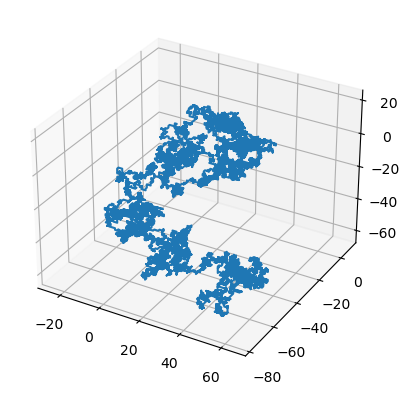

In [26]:
import random

x = [0]
y = [0]
z = [0]

resultados = []

sentido = [x, y, z]
at = [1, -1]



for i in range(10):
    posicion_at = [0]
    
    for j in range(1000):
        resultado_sentido = random.choice(sentido)
        resultado_at = random.choice(at)
        
        if resultado_sentido == x:
            x.append( x[-1] + resultado_at )
            y.append( y[-1] )
            z.append( z[-1] )
            
        elif resultado_sentido == y:
            x.append( x[-1] )
            y.append( y[-1] + resultado_at )
            z.append( z[-1] )
            
        elif resultado_sentido == z:
            x.append( x[-1] )
            y.append( y[-1] )
            z.append( z[-1] + resultado_at )           
    
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax1 = fig.add_subplot(111,projection='3d')

xv = np.array([x])
yv = np.array([y])
zv = np.array([z])

ax1.plot_wireframe(xv, yv, zv)

plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [14]:
import numpy as np

moneda = ["Sol", "criz"]

def volado():
    resultado = np.random.choice(moneda)
    if resultado == "Sol":
        return True
    else:
        return False
volado()

True

In [15]:
capital = []

def juego(C0):
    
    capital.append(C0)
    
    while capital[-1] > 0:
        
        if capital[-1] >= 6:
            apuesta = capital[-1] / 2
        else:
            apuesta = 2
    
        resultado = volado()
        
        if resultado == True:
            capital.append(capital[-1] + apuesta)
        else:
            capital.append(capital[-1] - apuesta)
        
juego(20)
capital

[20,
 30.0,
 45.0,
 67.5,
 101.25,
 151.875,
 227.8125,
 341.71875,
 512.578125,
 768.8671875,
 1153.30078125,
 576.650390625,
 864.9755859375,
 432.48779296875,
 648.731689453125,
 324.3658447265625,
 486.54876708984375,
 729.8231506347656,
 364.9115753173828,
 182.4557876586914,
 91.2278938293457,
 136.84184074401855,
 68.42092037200928,
 102.63138055801392,
 153.94707083702087,
 76.97353541851044,
 115.46030312776566,
 57.73015156388283,
 86.59522734582424,
 129.89284101873636,
 194.83926152810454,
 292.2588922921568,
 438.3883384382352,
 219.1941692191176,
 328.7912538286764,
 164.3956269143382,
 82.1978134571691,
 41.09890672858455,
 61.64836009287683,
 30.824180046438414,
 46.23627006965762,
 69.35440510448643,
 104.03160765672965,
 52.015803828364824,
 78.02370574254724,
 39.01185287127362,
 19.50592643563681,
 29.258889653455213,
 43.88833448018282,
 21.94416724009141,
 32.91625086013711,
 16.458125430068556,
 8.229062715034278,
 12.343594072551417,
 6.171797036275708,
 3.08589

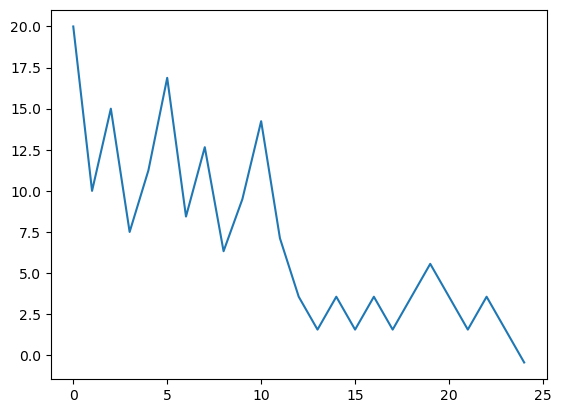

In [16]:
m = len(capital)
x = np.linspace(0, m-1, m)
def grafica():
    plt.figure()
    plt.plot(x, capital)
    
grafica()

In [21]:
N = 5000
n_veces = []
for i in range(N):
    capital = []
    def juego(C0):
        capital.append(C0)
        while capital[-1] > 0:
            if capital[-1] >= 6:
                apuesta = capital[-1] / 2
            else:
                apuesta = 2
            resultado = volado()
            if resultado == True:
                capital.append(capital[-1] + apuesta)
            else:
                capital.append(capital[-1] - apuesta)

    juego(20)
    veces = n_veces.append(len(capital))
    
promedio = np.mean(n_veces)
promedio

27.2842

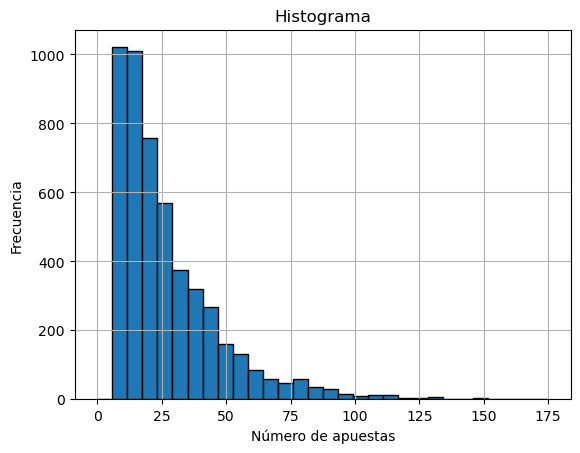

In [24]:
plt.hist(n_veces, bins=30, range=(0, 175), edgecolor="k")
plt.title("Histograma")
plt.xlabel("Número de apuestas")
plt.ylabel("Frecuencia")
plt.grid()